In [15]:
from ConsLaborPortfolioModel import LaborPortfolioConsumerType
from HARK.interpolation import WarpedInterpOnInterp2D
from HARK.utilities import plot_funcs
import numpy as np
import matplotlib.pyplot as plt

In [16]:
agent = LaborPortfolioConsumerType()
agent.cycles = 1

In [17]:
def plot_3d_func(func, lims_x, lims_y, n=100):
    # get_ipython().run_line_magic("matplotlib", "widget")
    xmin, xmax = lims_x
    ymin, ymax = lims_y
    xgrid = np.linspace(xmin, xmax, n)
    ygrid = np.linspace(ymin, ymax, n)

    xMat, yMat = np.meshgrid(xgrid, ygrid, indexing="ij")

    zMat = func(xMat, yMat)

    ax = plt.axes(projection="3d")
    ax.plot_surface(xMat, yMat, zMat, cmap="viridis")
    ax.set_title("surface")
    ax.set_xlabel("b")
    ax.set_ylabel(r"$\theta$")
    ax.set_zlabel("f")
    plt.show()

In [18]:
consumption_stage = agent.solution_terminal.consumption_stage

In [19]:
consumption_stage

ConsumptionStage(c_func=<function LaborPortfolioConsumerType.update_solution_terminal.<locals>.<lambda> at 0x000001B956E85900>, v_func=<HARK.rewards.UtilityFuncCRRA object at 0x000001B956EB3C40>, vp_func=<bound method UtilityFunction.der of <HARK.rewards.UtilityFuncCRRA object at 0x000001B956EB3C40>>, mNrmMin=0.0)

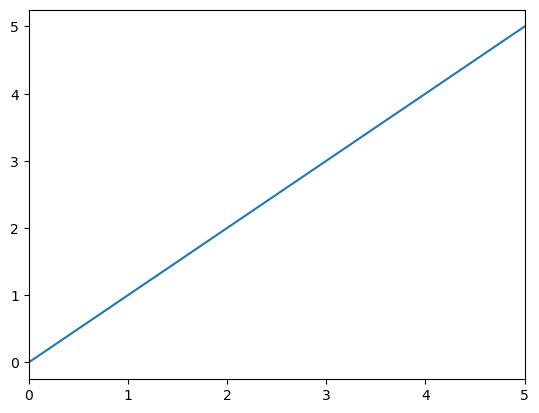

In [20]:
plot_funcs(consumption_stage.c_func, 0, 5)

In [21]:
agent.solve()

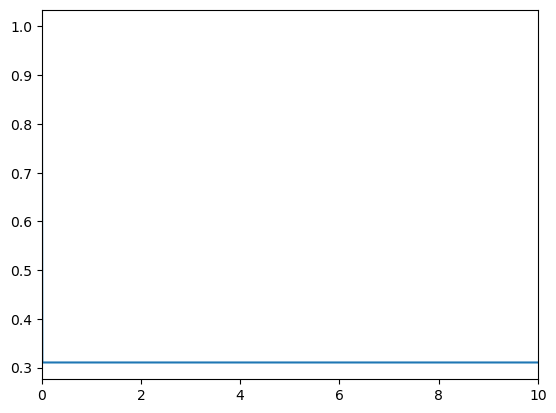

In [22]:
plot_funcs(agent.solution[0].portfolio_stage.share_func, 0, 10)

c:\Users\alujan\miniconda3\envs\egmn-dev\lib\site-packages\HARK\interpolation\_hark.py:818: RuntimeWarning: invalid value encountered in divide
  alpha = (x - self.x_list[i - 1]) / (self.x_list[i] - self.x_list[i - 1])


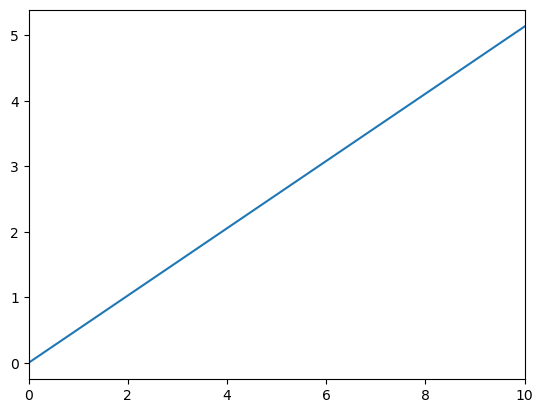

In [23]:
plot_funcs(agent.solution[0].consumption_stage.c_func, 0, 10)

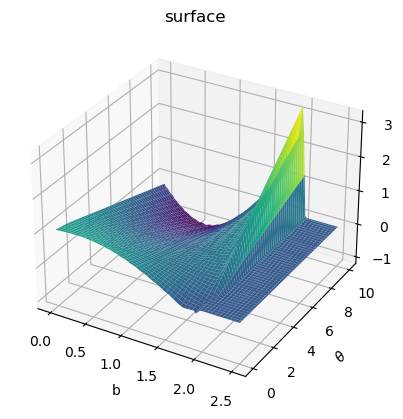

In [24]:
plot_3d_func(agent.solution[0].labor_stage.labor_func, [0, 2.5], [0, 10])

In [25]:
grids = agent.solution[0].labor_stage.grids

Text(0.5, 0, 'f')

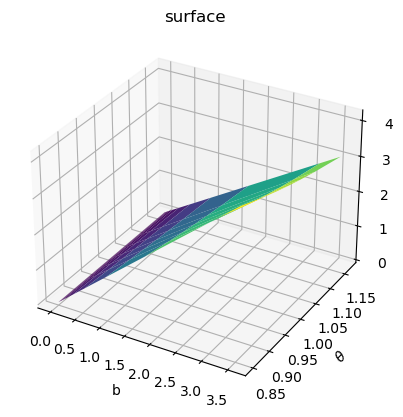

In [26]:
ax = plt.axes(projection="3d")
ax.plot_surface(grids["bNrm"], grids["tShk"], grids["leisure"], cmap="viridis")
ax.set_title("surface")
ax.set_xlabel("b")
ax.set_ylabel(r"$\theta$")
ax.set_zlabel("f")

In [27]:
grids["tShk"].shape

(202, 7)

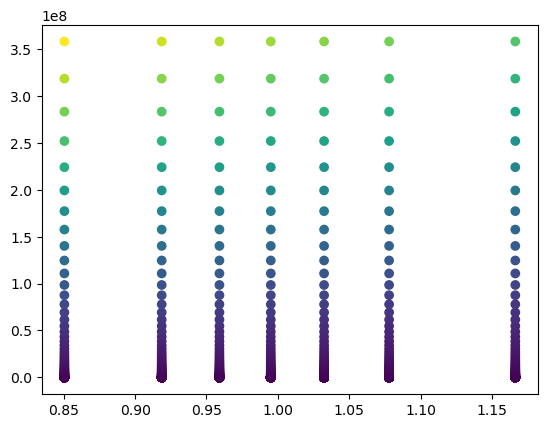

In [37]:
plt.scatter(grids["tShk"], grids["bNrm"], c=grids["leisure"])

In [30]:
labor_unconstrained_func = WarpedInterpOnInterp2D(
    grids["leisure"], [grids["bNrm"], grids["tShk"]]
)

In [34]:
labor_unconstrained_func([0, 1], [0, 1])

IndexError: index 7 is out of bounds for axis 1 with size 7

In [35]:
grids["bNrm"].shape, grids["tShk"].shape, grids["leisure"].shape

((202, 7), (202, 7), (202, 7))